**$Decision Tree Project Tutorial$**

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 70.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 76.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 25.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 52.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, 

**#Step 1 Load the Dataset**

In [5]:
# Load the dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Display descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Variables:

Pregnancies: Number of pregnancies of the patient (numeric)

Glucose: Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

BloodPressure: Diastolic blood pressure (measured in mm Hg) (numeric)

SkinThickness: Triceps skin fold thickness (measured in mm) (numeric)

Insulin: 2-hour serum insulin (measured in mu U/ml) (numeric)

BMI: Body mass index (numeric)

DiabetesPedigreeFunction: Diabetes Pedigree Function (numeric)

Age: Age of patient (numeric)

Outcome: Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric) - This is our target variable.

**#Step 2: Perform a Full EDA**

*Key EDA aspects to cover:*

*Missing Values*: Check for and handle any missing values. In this dataset, some columns might have 0 values which actually represent missing data (e.g., BloodPressure, Glucose, SkinThickness, Insulin, BMI). These should likely be treated as missing and imputed or removed.

*Data Types*: Confirm all columns have appropriate data types.

*Distribution of Features*: Visualize the distribution of each feature (histograms, box plots).

*Outlier Detection*: Identify and handle outliers.

*Correlation Analysis*: Understand the relationships between features and with the target variable (Outcome).

*Target Variable Distribution*: Analyze the balance of the Outcome variable (is it balanced or imbalanced?)


Missing values after replacing 0s with NaN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


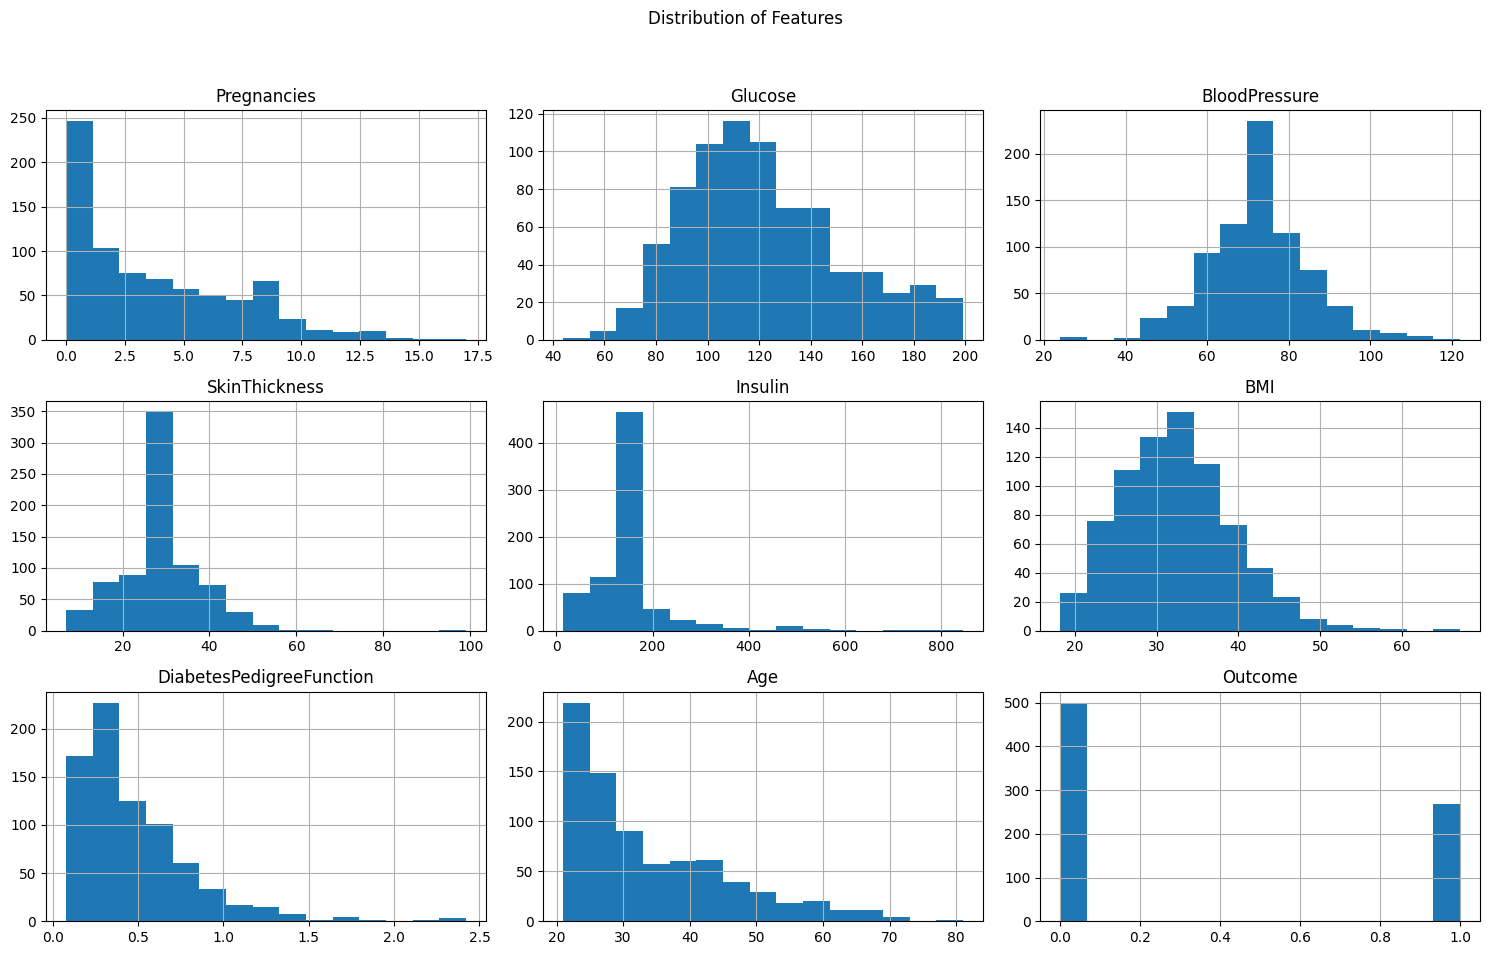

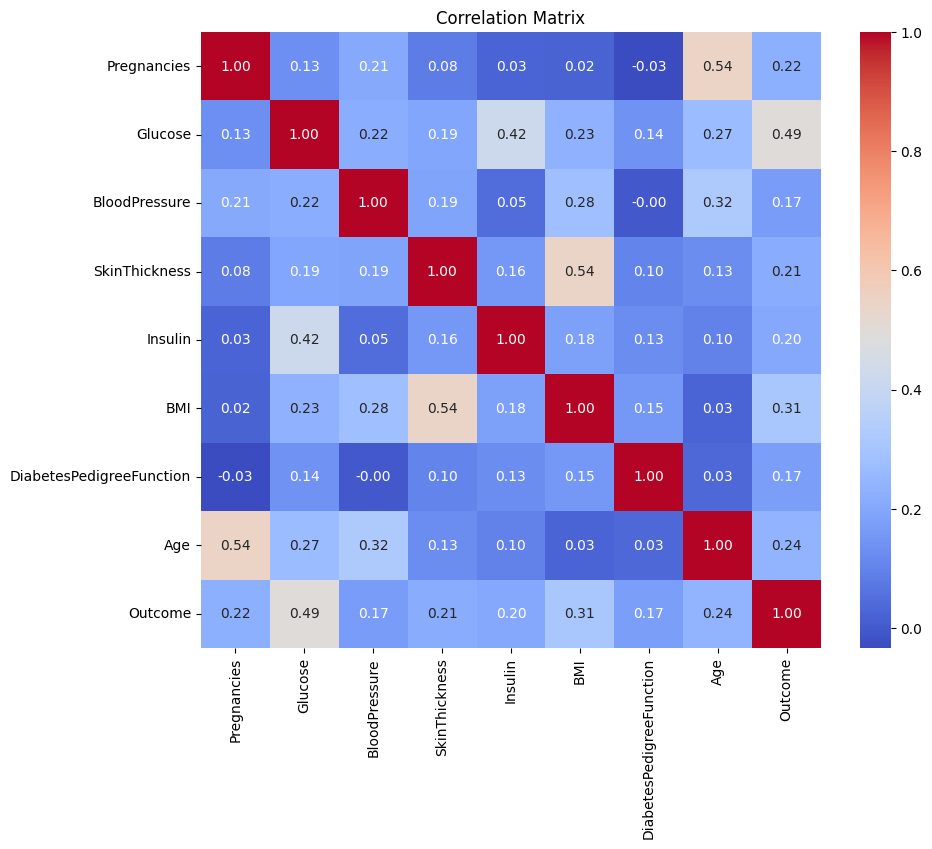

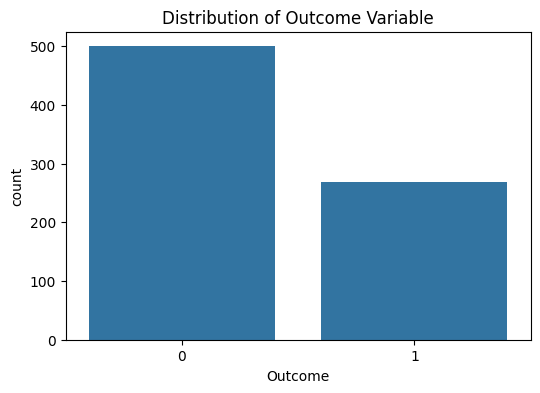

Outcome
0    500
1    268
Name: count, dtype: int64

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [11]:
# Identify columns with potential '0' as missing values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN for clearer handling
df[cols_with_zeros] = df[cols_with_zeros].replace(0, pd.NA)

# Check for missing values after replacement
print("\nMissing values after replacing 0s with NaN:")
print(df.isnull().sum())

# --- Handle Missing Values (Example: Imputation with median) ---
# You might choose different imputation strategies based on your EDA
for col in cols_with_zeros:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

# --- Distribution of features ---
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Correlation Matrix ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# --- Distribution of the target variable ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.show()
print(df['Outcome'].value_counts())

# --- Divide the dataset into train and test ---
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify for balanced classes

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

**#Step 3: Build a Decision Tree**

--- Decision Tree with Gini Impurity ---
Accuracy: 0.6818
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154

Confusion Matrix:
[[79 21]
 [28 26]]

--- Decision Tree with Entropy (Information Gain) ---
Accuracy: 0.6753
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154

Confusion Matrix:
[[76 24]
 [26 28]]


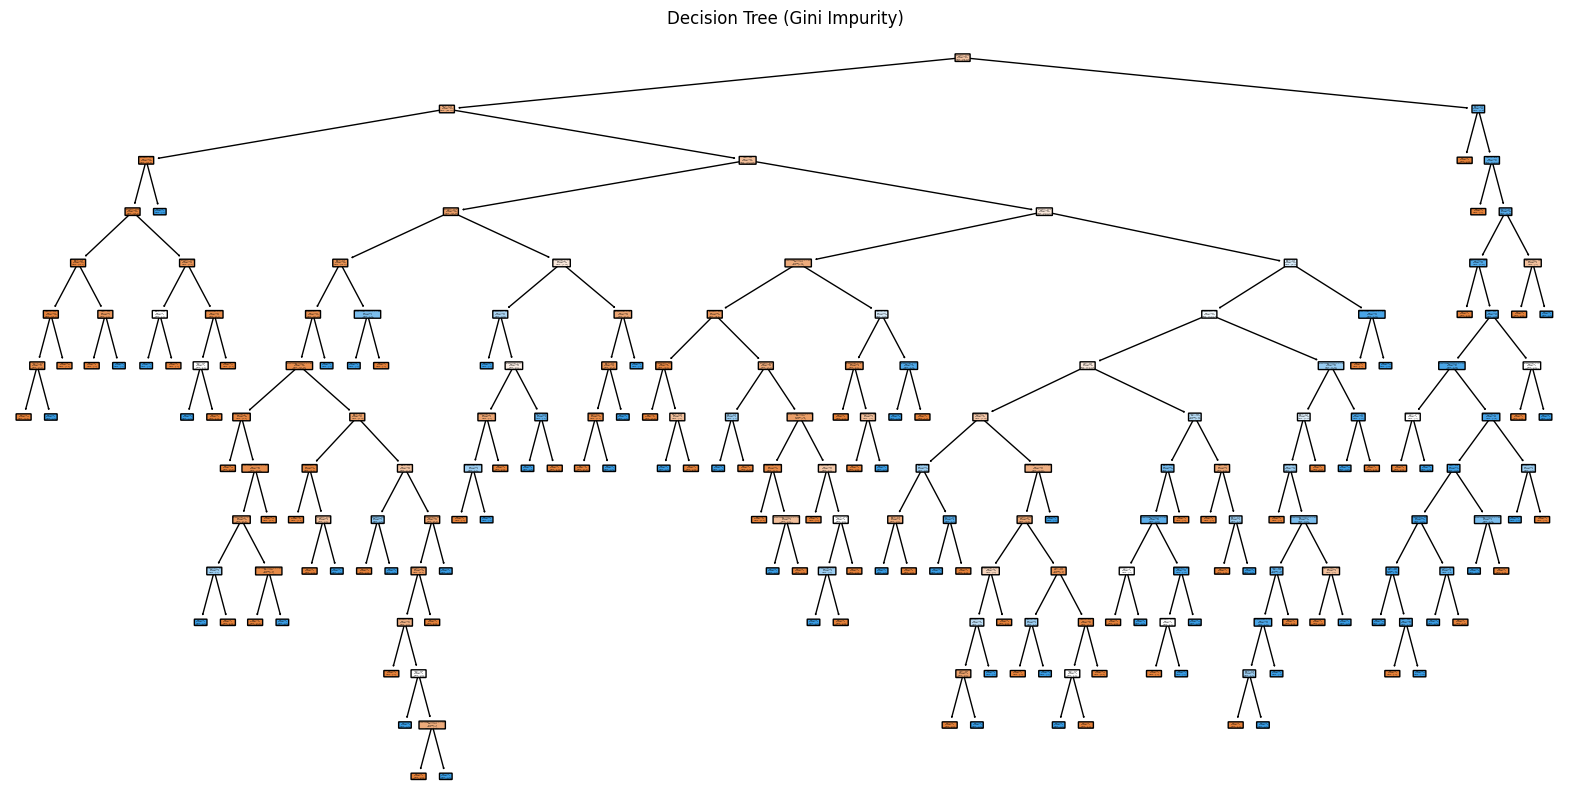

In [13]:
# Initialize Decision Tree Classifiers with different criteria
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# --- Train the models ---
dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

# --- Make predictions ---
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

# --- Evaluate the models ---
print("--- Decision Tree with Gini Impurity ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gini):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gini))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

print("\n--- Decision Tree with Entropy (Information Gain) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_entropy):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_entropy))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_entropy))

# --- Visualize one of the trees (e.g., Gini) ---
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=X.columns.tolist(), class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.title("Decision Tree (Gini Impurity)")
plt.show()


Models Tested:

Gini Impurity Decision Tree

Entropy (Information Gain) Decision Tree

Key Findings:
1. Overall Accuracy:
Both models showed very similar and moderate accuracy.

Gini Impurity Model: 68.18%

Entropy Model: 67.53%

The difference between them is negligible.

2. Performance for "No Diabetes" (Class 0 - Majority Class):
Both models performed well for this class.

Precision and Recall ranged from 74% to 79%.

This strong performance is expected, as Class 0 is the larger group (100 samples in the test set).

3. Performance for "Diabetes" (Class 1 - Minority Class):
This is the critical area of weakness for both models.

Low Recall for Class 1 (Missing actual diabetes cases):

Gini model correctly identified only 48% (26 out of 54) of actual diabetes cases.

Entropy model correctly identified 52% (28 out of 54) of actual diabetes cases.

This means nearly half of patients with diabetes were missed by both models.

Low Precision for Class 1 (False alarms for diabetes):

Only 55% (Gini) and 54% (Entropy) of the predictions for diabetes were actually correct.

4. Confusion Matrix Highlights:
Both models produced a high number of False Negatives:

Gini Model: 28 False Negatives

Entropy Model: 26 False Negatives

This signifies that many individuals who actually had diabetes were incorrectly classified as healthy, which is a significant concern in a medical context.

Conclusion on Criterion:
While overall accuracy was nearly identical, Entropy slightly outperformed Gini in identifying actual diabetes cases (higher recall for Class 1). Given the importance of not missing a diagnosis, Entropy is marginally preferred for this dataset.

However, it's crucial to note that neither model is performing adequately for reliable diabetes prediction in its current state.

Why the Performance is Suboptimal:
Overfitting: The visualized decision tree is very deep, indicating it might be overly specialized to the training data and struggling to generalize to new, unseen data.

Dataset Imbalance: The uneven distribution of classes (100 'No Diabetes' vs. 54 'Diabetes' in the test set) likely biases the models to prioritize the majority class.

Next Steps:
Hyperparameter Optimization (using Grid Search): The immediate focus is to refine the model's performance by tuning parameters like max_depth. This will help prevent overfitting and aim for better generalization on unseen data.

**#Step 4: Optimize the Previous Model**

In [ ]:
# Choose the best criterion based on Step 3's analysis (e.g., if Gini was better)
best_criterion = 'gini' # Or 'entropy'
dt_base = DecisionTreeClassifier(criterion=best_criterion, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # None means unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'], # Consider 'sqrt' for max_features for classification
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_base, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Get the best estimator (the optimized model)
best_dt_model = grid_search.best_estimator_

# Evaluate the optimized model on the test set
y_pred_optimized = best_dt_model.predict(X_test)

print("\n--- Optimized Decision Tree Model ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred_optimized)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits



Best parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation accuracy: 0.7509

--- Optimized Decision Tree Model ---
Accuracy: 0.6883
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154

Confusion Matrix:


array([[92,  8],
       [40, 14]])

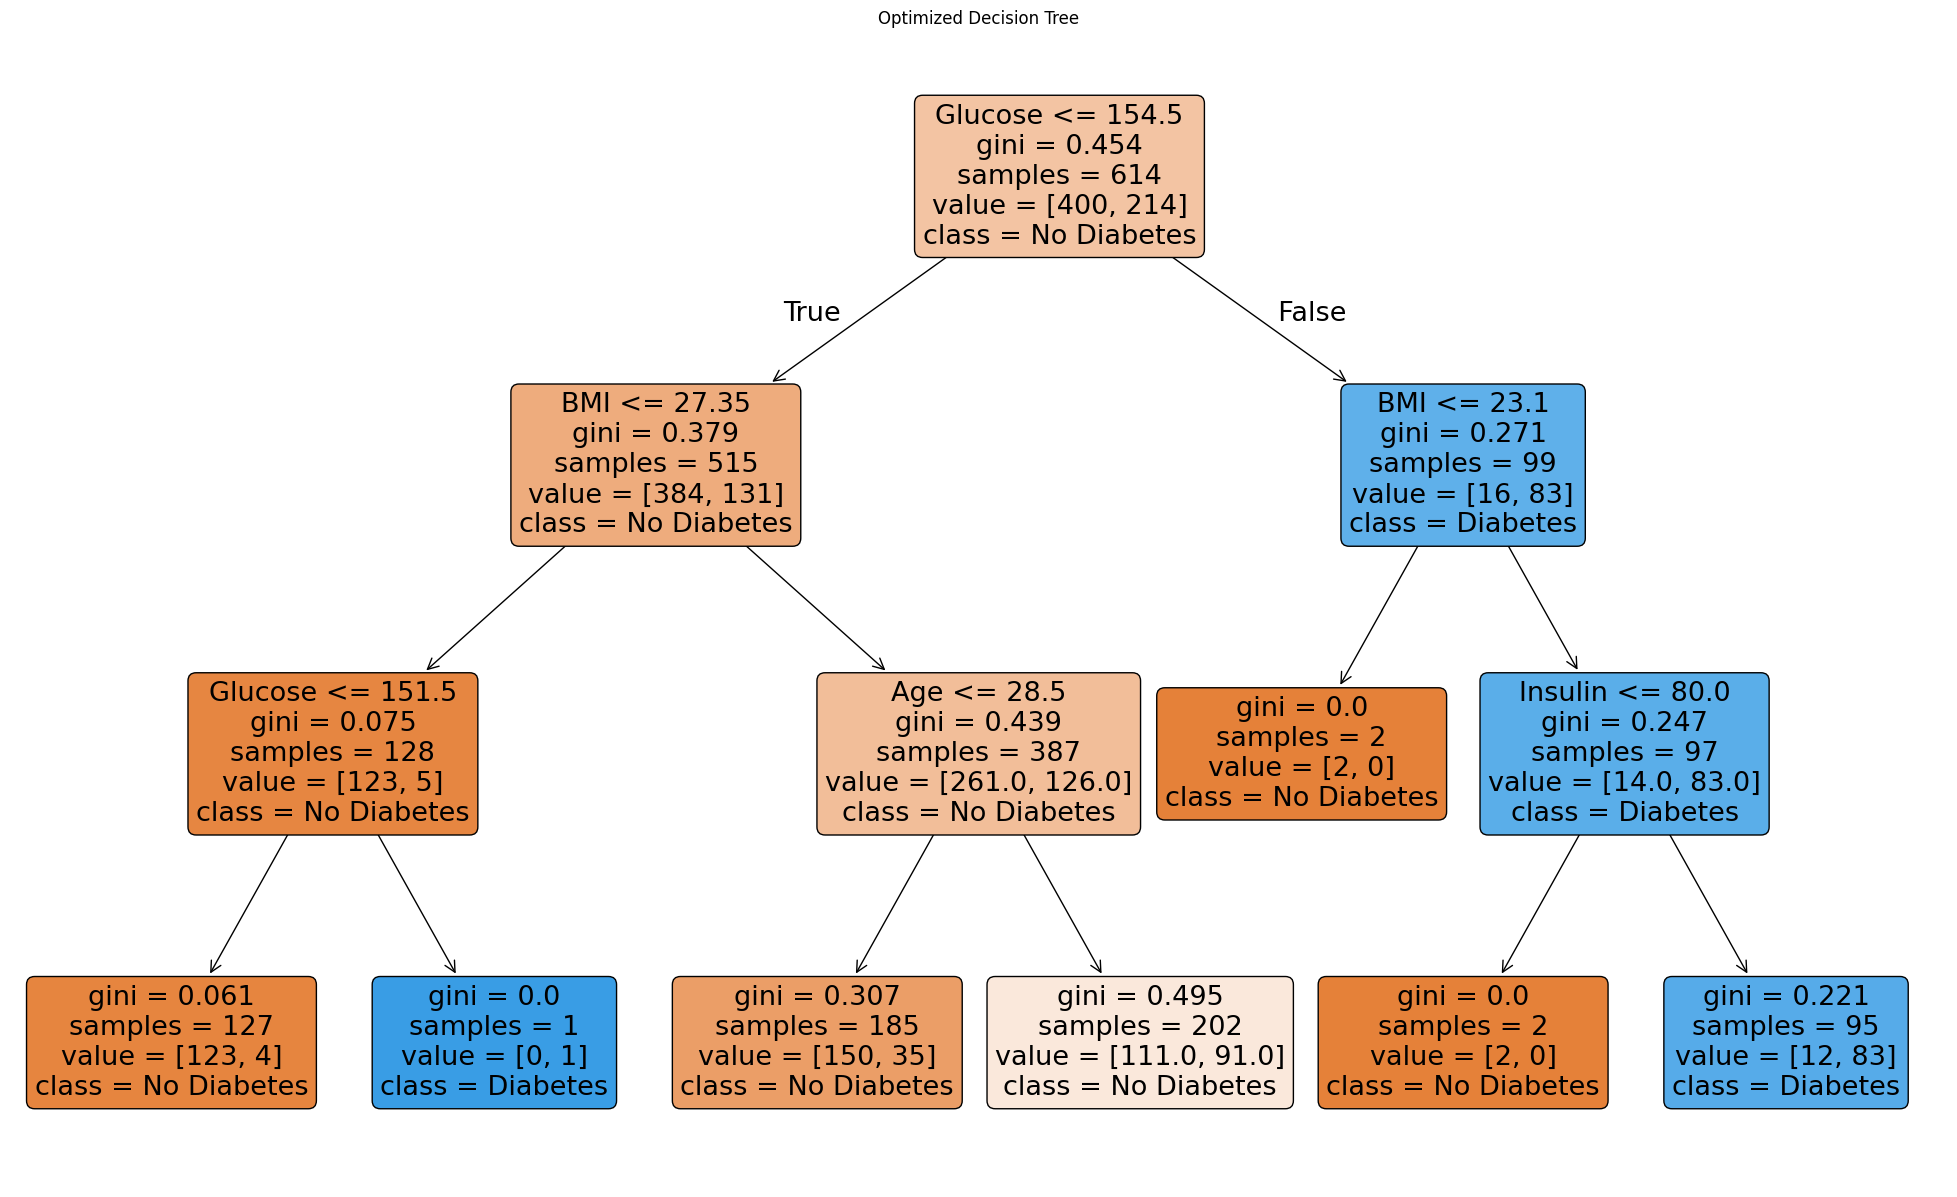

In [ ]:
# Visualize the optimized tree
plt.figure(figsize=(25, 15))
plot_tree(best_dt_model, feature_names=X.columns.tolist(), class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.title("Optimized Decision Tree")
plt.show()

**Optimized Decision Tree Model Summary**

Goal: Predict diabetes (Class 1) vs. no diabetes (Class 0).

Optimization Method: Grid Search found max_depth=3 as the best parameter for tree simplicity.

Results on Test Set (154 samples):

Overall Accuracy: 68.83% (Slightly improved from before).

"No Diabetes" (Class 0) Performance: Excellent (92% Recall, 70% Precision). The model is very good at identifying healthy patients (92 out of 100 correctly identified).

"Diabetes" (Class 1) Performance: Significantly Worse.

Recall: 26% (Only 14 out of 54 actual diabetes cases were correctly identified).

Precision: 64% (When it does predict diabetes, it's right 64% of the time).

Key Issue: High False Negatives (40) – meaning 40 individuals with diabetes were incorrectly classified as healthy, a critical error in a medical context.

Conclusion:

The optimization created a simpler, more interpretable tree, which is good. However, by aggressively preventing overfitting, the model became too conservative in predicting diabetes. While it's much better at identifying "no diabetes" cases, its ability to find actual diabetes patients (recall) drastically suffered.

For a medical diagnosis, this model is unsuitable due to its high rate of missed diagnoses. Further work is needed to balance performance across both classes, potentially using different scoring metrics for optimization or techniques for handling imbalanced data.

In [ ]:
# Create a directory for models if it doesn't exist
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the path to save the model
model_path = os.path.join(model_dir, 'best_diabetes_decision_tree_model.joblib')

# Save the optimized model
joblib.dump(best_dt_model, model_path)

print(f"\nModel saved successfully to: {model_path}")


Model saved successfully to: models/best_diabetes_decision_tree_model.joblib
